In [3]:
import sys
sys.path.append("../getData")
sys.path.append("../../visualization")
sys.path.append("../functions")
import bdStocks
import graficosJupyterNotebook as graficos
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

In [4]:
exchange="MC"
indiceName="ibex35"
getsectors=True
getdescriptions=False
columnas=["netIncome","totalRevenue","stock"]
columnasPrecios=["Adjusted_close","stock"]
not_index=True

In [87]:
bd=bdStocks.getData()
precios=bd.getPrizesByExchange(exchange,columnas=columnasPrecios)
fundamentals=bd.getFundamentalsByExchange(exchange,bd=True,columnas=columnas)
indice=bd.getIndexPrizes(indiceName)
if getsectors:
    sectors=bd.getSectors(exchange)
    fundamentals["sector"]=fundamentals["stock"].transform(lambda t:sectors[t])
if   getdescriptions:
    descriptions=bd.getDescriptions(exchange)
    fundamentals["description"]=fundamentals["stock"].transform(lambda t:descriptions[t])
if not_index:
    precios.reset_index(inplace=True)
    fundamentals.reset_index(inplace=True)

Time: 03/01/2022, 21:40 Message: CSV access time to get prizes 1.7390015125274658

Time: 03/01/2022, 21:40 Message: Object size (prizes data)63.413051 MB

Time: 03/01/2022, 21:40 Message: BD access time to get stock fundamentals 0.413482666015625

Time: 03/01/2022, 21:40 Message: Object size (fundamental data)8.026913 MB

Time: 03/01/2022, 21:40 Message: BD access time to sectors 0.04405522346496582



In [142]:
import itertools

sectors=np.unique(fundamentals["sector"])
dataframeAnalysis=fundamentals.loc[fundamentals["sector"].isin([sectors[-6]])]
stocks=np.unique(dataframeAnalysis["stock"])
stocks=iter(stocks)
dataframeAnalysis.shape

(668, 5)

(75, 1)


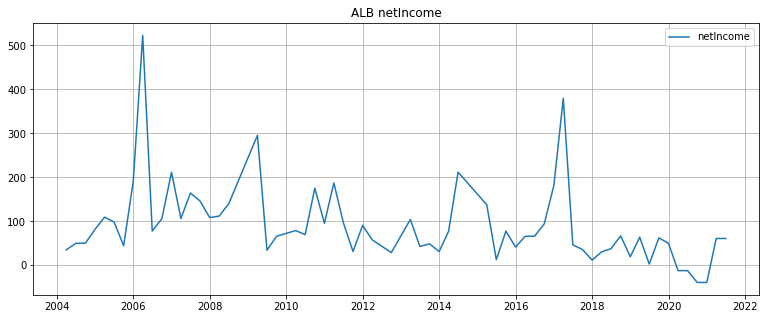

,netIncome
fecha,
2004-03-31,35.162
2004-06-30,49.938
2004-09-30,50.413
2004-12-31,81.892
2005-03-31,109.445
2005-06-30,98.609
2005-09-30,44.446
2005-12-31,191.769
2006-03-31,522.971


In [143]:
stock=next(stocks)
column="netIncome"
data=dataframeAnalysis.loc[dataframeAnalysis["stock"]==stock,["fecha",column]]
data.set_index("fecha",inplace=True,drop=True)
print(data.shape)
data=data.dropna()/1000000
graficos.linearplot(data,stock+" "+column,False,column)
data

-39.05


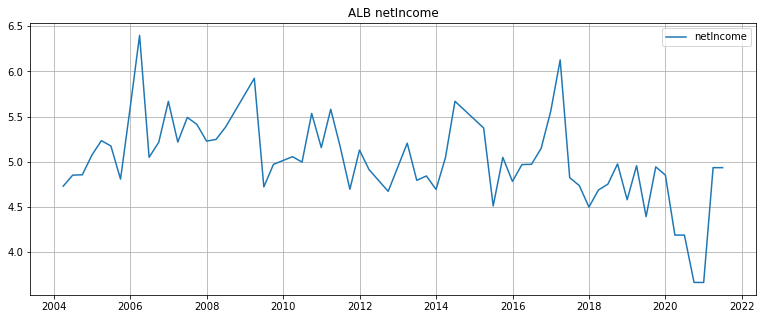

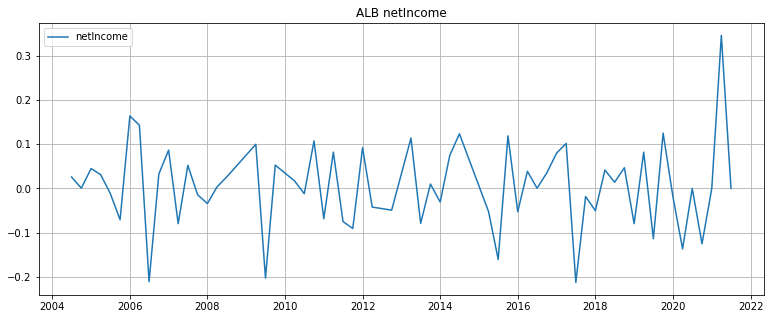

-39.05


In [144]:
import math
import transformations
minimo=np.min(data)[0]
if minimo<0:
    print(minimo)
    data=data-minimo*2
boxcox=transformations.boxcox
data1=(data).applymap(lambda x:(boxcox(0,x)))
graficos.linearplot(data1,stock+" "+column,False,column)
graficos.linearplot(data1.transform(lambda x:x.pct_change()),stock+" "+column,False,column)
print(minimo)

In [159]:
from statsmodels.tsa.stattools import adfuller
#la hipotesis nula es que hay raiz unitaria
adf=adfuller(data1[column],maxlag=1)
adf

(-4.624114602162742,
 0.00011657604156187798,
 0,
 62,
 {'1%': -3.540522678829176,
  '5%': -2.9094272025108254,
  '10%': -2.5923136524453696},
 72.25083983887532)

[ 1.          0.47697152  0.27252317  0.25353733  0.12831014  0.1888364
  0.18349331  0.11222183  0.20951782  0.10368653  0.19789532  0.09143978
 -0.01202015 -0.02616163 -0.07126115 -0.17282929 -0.08582452 -0.01624093
  0.04628819  0.09588743  0.08560437  0.01627556 -0.03009578 -0.12115549
 -0.07698617 -0.01062001  0.01295982  0.09662497  0.10791601  0.03990453
 -0.00563869]
[ 1.          0.48466461  0.0608529   0.14248179 -0.06666594  0.17163399
  0.03204294 -0.00793257  0.17325114 -0.11087152  0.25201325 -0.24507063
  0.01398028 -0.1747858  -0.02043512 -0.2845175   0.09386565  0.12581959
  0.05886689  0.26898035 -0.06369773  0.14301402 -0.2665506  -0.0535938
 -0.13070175  0.20216352 -0.01809493  0.23252158  0.07638724 -0.20932859
 -0.21359398]


/home/manuel/anaconda3/envs/bolsa/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<BarContainer object of 31 artists>

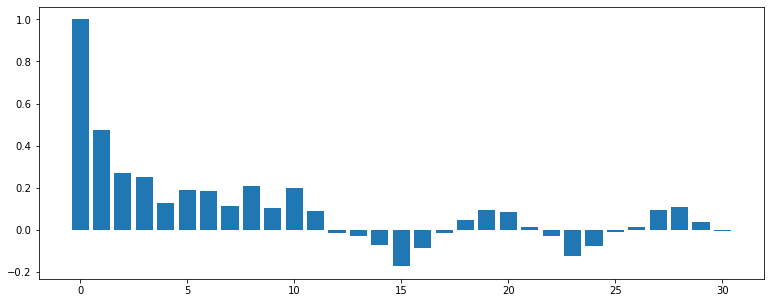

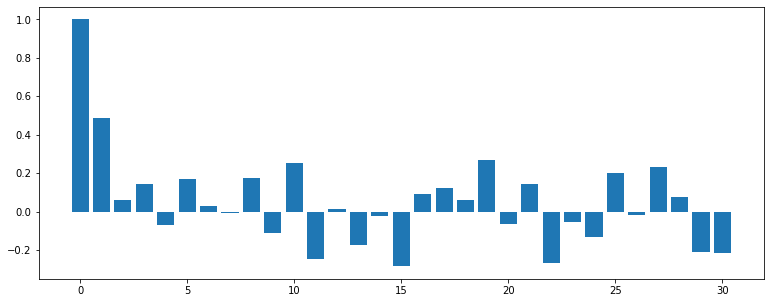

In [183]:
nlags=30
from statsmodels.tsa.stattools import acf
corr=acf(data1[column],nlags=nlags)
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
pcorr=pacf(data1[column],nlags=nlags)
print(corr)
print(pcorr)
from  statsmodels.tsa.stattools import arma_order_select_ic  as select_order
modelo=select_order(data1[column])
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(13,5))
plt.bar(range(len(corr)),corr)
fig=plt.figure(figsize=(13,5))
plt.bar(range(len(pcorr)),pcorr)